# Explore here

It's recommended to use this notebook for exploration purposes.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
url = "https://companies-market-cap-copy.vercel.app/index.html"

In [17]:
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    print("HTML content downloaded successfully.")
else:
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    response = request.text


HTML content downloaded successfully.


In [20]:
soup = BeautifulSoup(html_content, 'html.parser')

revenue_table = soup.find('table')

if revenue_table:
    print("Revenue table found.")
else:
    print("Could not find the revenue table.")

# Extract all rows and columns from the table
rows = revenue_table.find_all('tr')

Revenue table found.


In [23]:
rows

[<tr>
 <th>Year</th>
 <th>Revenue</th>
 <th>Change</th>
 </tr>,
 <tr><td><span class="year">2024</span></td><td>$97.15 B</td><td class="percentage-green">0.39%</td></tr>,
 <tr><td><span class="year">2023</span> </td><td>$96.77 B</td><td class="percentage-green">18.8%</td></tr>,
 <tr><td><span class="year">2022</span></td><td>$81.46 B</td><td class="percentage-green">51.35%</td></tr>,
 <tr><td><span class="year">2021</span></td><td>$53.82 B</td><td class="percentage-green">70.67%</td></tr>,
 <tr><td><span class="year">2020</span></td><td>$31.53 B</td><td class="percentage-green">28.31%</td></tr>,
 <tr><td><span class="year">2019</span></td><td>$24.57 B</td><td class="percentage-green">14.52%</td></tr>,
 <tr><td><span class="year">2018</span></td><td>$21.46 B</td><td class="percentage-green">82.51%</td></tr>,
 <tr><td><span class="year">2017</span></td><td>$11.75 B</td><td class="percentage-green">67.98%</td></tr>,
 <tr><td><span class="year">2016</span></td><td>$7.00 B</td><td class="pe

In [32]:
# Prepare data for the DataFrame
data = []
for row in rows[1:]:
    columns = row.find_all('td')
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    data.append([date, revenue])

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['Date', 'Revenue'])
df = df.sort_values("Date")

df.head()

,Date,Revenue
15,2009,$0.11 B
14,2010,$0.11 B
13,2011,$0.20 B
12,2012,$0.41 B
11,2013,$2.01 B


In [33]:
def convert_to_float(value):
    if 'B' in value:
        edit_value = float(value.replace("B", "").replace("$", "").replace(",", ""))
        return edit_value
    else:
        return float(value)

In [34]:
df['Revenue'] = df['Revenue'].apply(convert_to_float)
df.head()

,Date,Revenue
15,2009,0.11
14,2010,0.11
13,2011,0.20
12,2012,0.41
11,2013,2.01


In [35]:
con = sqlite3.connect('tesla_revenue.db')
cursor = con.cursor()

cursor.execute('''
               CREATE TABLE IF NOT EXISTS revenue (
                Date TEXT,
                Revenue REAL
               )
               ''')

In [36]:
df.to_sql('revenue', con, if_exists='append', index=False)
con.commit()
con.close()

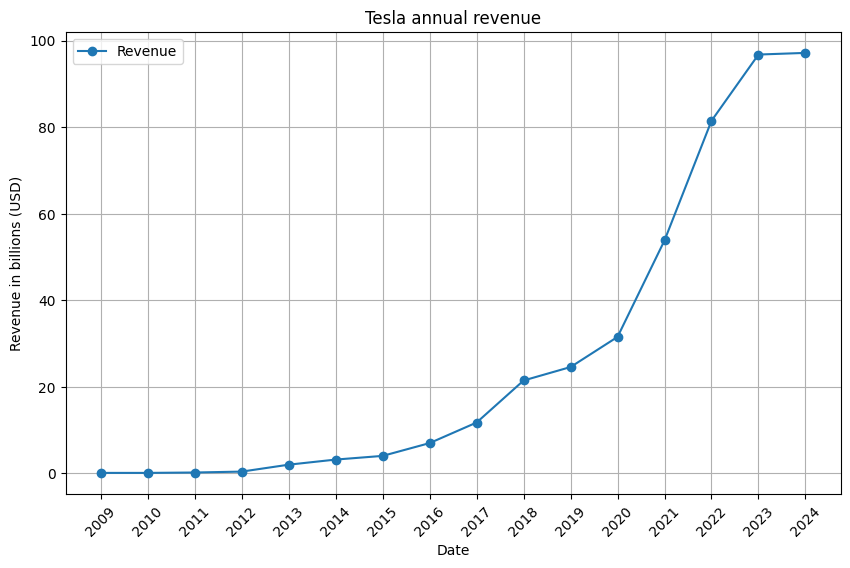

In [38]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Revenue"], marker='o', label="Revenue")
plt.title("Tesla annual revenue")
plt.xlabel("Date")
plt.ylabel("Revenue in billions (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Save and display the chart
plt.savefig("revenue_plot.png")
plt.show()